# Unsupervised Learning

## Importing The liberires

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing The Data-Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Folder /Mall Dataset.csv')

## Exploring The Data-Set

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Outliers

In [ ]:
df=df.drop('Genre',axis=1)

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [ ]:
for col in df.columns:
    has_outliers(df, col)

CustomerID no
Age no
Annual Income (k$) yes
Annual Income (k$) no
Spending Score (1-100) no


In [ ]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
replace_with_thresholds(df, df.columns)

In [ ]:
# Check if there still outliers
for col in df.columns:
    has_outliers(df, col)

CustomerID no
Age no
Annual Income (k$) no
Spending Score (1-100) no


# **Clustering Analysis**


## K-Mean Algorithm

In [ ]:
data = df.iloc[:,[2,3]].values

### Elbow Method

In [ ]:
from sklearn.cluster import KMeans
wcss = []                    #within-cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(data)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

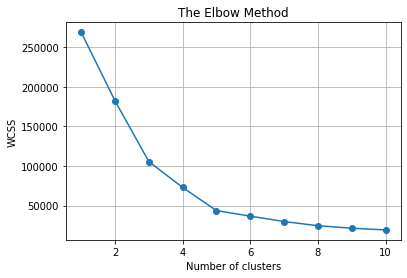

In [ ]:
number_of_clusters = range(1,11)
plt.plot(number_of_clusters, wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(axis='both')
plt.show()

### Silhouette Method

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = range(2,11) 
s_scores = [] # silhouette scores

for n in n_clusters:
    kmeans_sil = KMeans(n_clusters=n, init='k-means++')
    kmeans_sil.fit(data)
    silhouette_avg = silhouette_score(data, kmeans_sil.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score meth

<function matplotlib.pyplot.show>

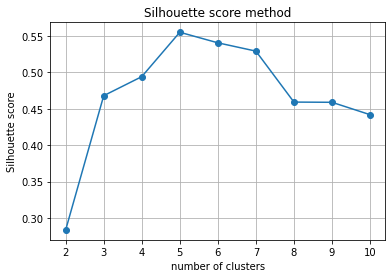

In [ ]:
plt.plot(n_clusters, s_scores, marker='o')
plt.title("Silhouette score method")
plt.xlabel("number of clusters")
plt.ylabel("Silhouette score")
plt.grid(axis='both')
plt.show

### K-Means

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y = kmeans.fit_predict(data)

### Visualization

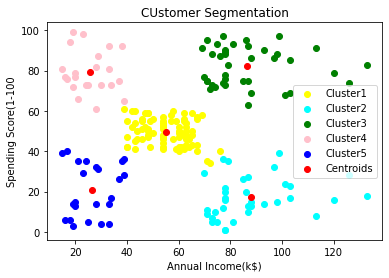

In [ ]:
plt.scatter(data[y == 0, 0], data[y == 0, 1], c = 'yellow', label = 'Cluster1')
plt.scatter(data[y == 1, 0], data[y == 1, 1], c = 'cyan', label = 'Cluster2')
plt.scatter(data[y == 2, 0], data[y == 2, 1],  c = 'green', label = 'Cluster3')
plt.scatter(data[y == 3, 0], data[y == 3, 1] , c = 'pink', label = 'Cluster4')
plt.scatter(data[y == 4, 0], data[y == 4, 1], c = 'blue', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'red', label = 'Centroids')

plt.title('CUstomer Segmentation')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()

### Define Customer's Segment of the Mall:


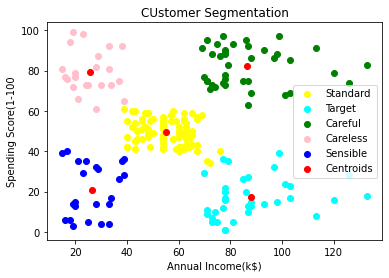

In [ ]:
plt.scatter(data[y == 0, 0], data[y == 0, 1], c = 'yellow', label = 'Standard')
plt.scatter(data[y == 1, 0], data[y == 1, 1], c = 'cyan', label = 'Target')
plt.scatter(data[y == 2, 0], data[y == 2, 1],  c = 'green', label = 'Careful')
plt.scatter(data[y == 3, 0], data[y == 3, 1] , c = 'pink', label = 'Careless')
plt.scatter(data[y == 4, 0], data[y == 4, 1], c = 'blue', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'red', label = 'Centroids')

plt.title('CUstomer Segmentation')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Data
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
df = pd.DataFrame(X, columns = ['x', 'y'])


def doKmeans(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    return (model.labels_, model.cluster_centers_)

clust_labels, cent = doKmeans(X, 2)

df['label'] = clust_labels
df

df[df['label'] == 1]

,x,y,label
3,4,2,1
4,4,4,1
5,4,0,1


In [ ]:
df


,x,y,label
0,1,2,0
1,1,4,0
2,1,0,0
3,4,2,1
4,4,4,1
5,4,0,1


In [ ]:
df[df['label'] == 1]


,x,y,label
3,4,2,1
4,4,4,1
5,4,0,1
